
# Use Bayesian Ridge Regression to compare the coefficient weights and the OLS (ordinary least squares) estimator


The goal of this research is to compute a Bayesian Ridge Regression on a synthetic dataset. For more information on the regressor , please, see `bayesian_ridge_regression` on Google.

First, we will compare the OLS (ordinary least squares) estimator to the coefficient
weights. We will notice that the coefficient weights are somewhat shifted toward zeros which allow them to be stable.

Since the prior on the weights is a Gaussian prior, then the histogram of the
estimated weights is Gaussian. 

Second, we will assess the estimation of the model by repeatedly maximizing the
marginal log-likelihood of the observations.

Ultimately, We will plot predictions and uncertainties for Bayesian Ridge Regression
for one dimensional regression using polynomial feature expansion.

After plotting predictions and uncertainties , we will noticet hat the uncertainty starts going up on the right side of the plot.
This result is due to these test samples because they are outside of the range of the training
samples.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression


In [57]:
# Creating simulated data with Gaussian weights and Create Gaussian data
np.random.seed(0)
# Setting the n_samples, n_features.
n_samples, n_features = 150, 150
X = np.random.randn(n_samples, n_features)  

In [58]:
print(X.shape)

(150, 150)


In [59]:
print(X[:1])

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
  -0.31155253  0.05616534 -1.16514984 

In [60]:
# Generate weights with a precision lambda_ of 5.
lambda_ = 5.
weights = np.zeros(n_features)

In [61]:
print(weights)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [62]:
# Choose and keep the only 20 weights of interest
suitable_features = np.random.randint(0, n_features, 20)
for i in suitable_features:
    weights[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

In [63]:
# Establish noise with a precision alpha of 60.
alpha_ = 60.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)

In [64]:
# Generate the target
y = np.dot(X, weights) + noise

In [65]:
# Fit the Bayesian Ridge Regression and an OLS (ordinary least squares) for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

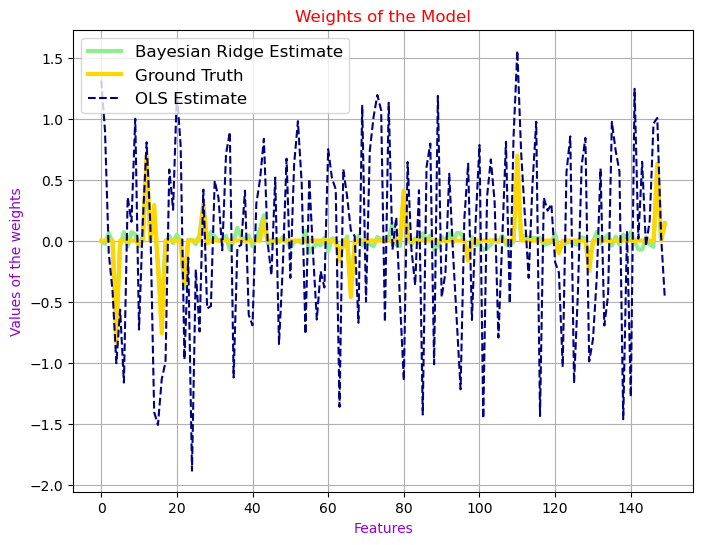

In [72]:
# Plot true weights, estimated weights, histogram of the weights, and predictions with standard deviations.
lw = 3
plt.figure(figsize=(8, 6))
plt.title("Weights of the Model", color='red')
plt.plot(clf.coef_, color='lightgreen', linewidth=lw, label="Bayesian Ridge Estimate")

plt.plot(weights, color='gold', linewidth=lw, label="Ground Truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS Estimate")
plt.xlabel("Features", color='darkviolet')
plt.ylabel("Values of the weights", color='darkviolet')
plt.legend(loc="best", prop=dict(size=12))
plt.grid(True)

In [67]:
# histogram of the weights

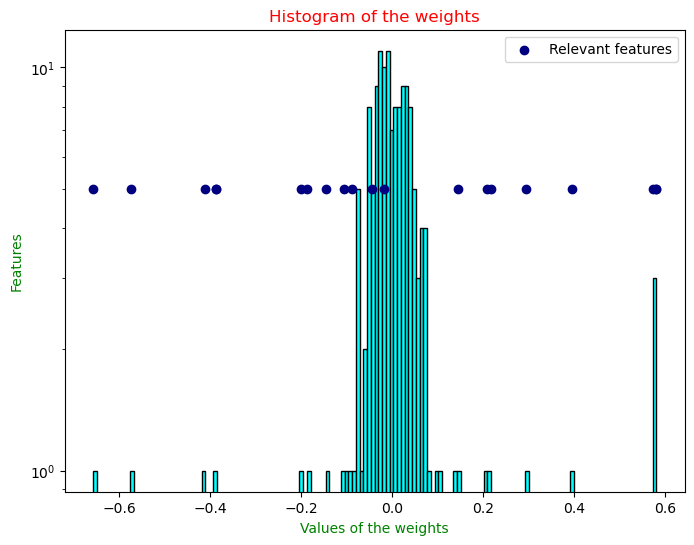

In [68]:
plt.figure(figsize=(8, 6))
plt.title("Histogram of the weights", color='red')
plt.hist(clf.coef_, bins=n_features, color='aqua', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[suitable_features], 5* np.ones(len(suitable_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features", color='green')
plt.xlabel("Values of the weights", color='green')
plt.legend(loc="upper right")

In [69]:
# Marginal log-likelihood

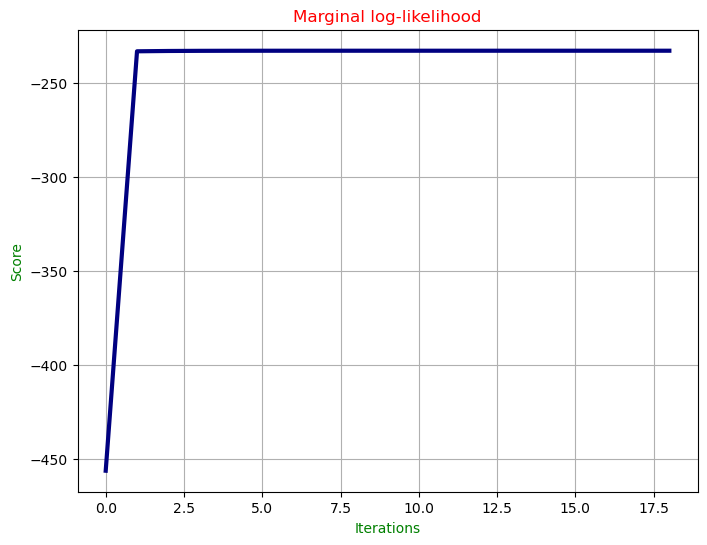

In [73]:
plt.figure(figsize=(8, 6))
plt.title("Marginal log-likelihood", color='red')
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score", color='green')
plt.xlabel("Iterations", color='green')
plt.grid(True)


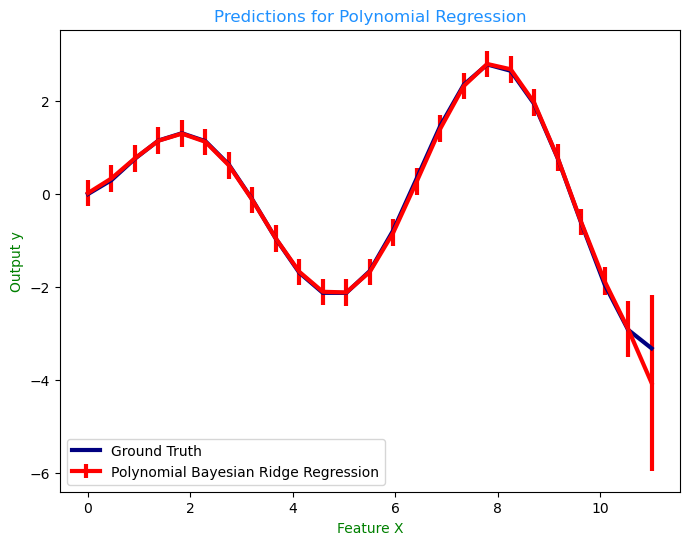

In [71]:
# Plotting some predictions for polynomial regression
def f(x, noise_quantity):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_quantity * noise

degree = 10
X = np.linspace(0, 10, 150, endpoint=True,axis=0 )
y = f(X, noise_quantity=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_quantity=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(8, 6))
plt.title("Predictions for Polynomial Regression", color='dodgerblue')
plt.errorbar(X_plot, y_mean, y_std, color='red',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='navy', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y", color='green')
plt.xlabel("Feature X", color='green')
plt.legend(loc="lower left")
plt.show()